# Importing Libraries (Toolkit)

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing & Inspecting Data

In [131]:
startups = pd.read_csv('/home/sakkarouis/startup_expansion.csv')

In [132]:
startups

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
0,1,Peoria,Arizona,Region 2,Old,"$2,601","$48,610"
1,2,Midland,Texas,Region 2,Old,"$2,727","$45,689"
2,3,Spokane,Washington,Region 2,Old,"$2,768","$49,554"
3,4,Denton,Texas,Region 2,Old,"$2,759","$38,284"
4,5,Overland Park,Kansas,Region 2,Old,"$2,869","$59,887"
...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,"$2,251","$34,603"
146,147,Brownsville,Texas,Region 2,New,"$3,675","$63,148"
147,148,Rockford,Illinois,Region 1,New,"$2,648","$43,377"
148,149,College Station,Texas,Region 2,New,"$2,994","$22,457"


In [133]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Store ID         150 non-null    int64 
 1   City             150 non-null    object
 2   State            150 non-null    object
 3   Sales Region     150 non-null    object
 4   New Expansion    150 non-null    object
 5   Marketing Spend  150 non-null    object
 6   Revenue          150 non-null    object
dtypes: int64(1), object(6)
memory usage: 8.3+ KB


in our dataset the colums type of Marketing spend and revenue are object so we should convert the type to int.

In [134]:
startups['Marketing Spend']=startups['Marketing Spend'].str.replace('[$,]', '', regex=True).astype(int)

In [135]:
startups

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
0,1,Peoria,Arizona,Region 2,Old,2601,"$48,610"
1,2,Midland,Texas,Region 2,Old,2727,"$45,689"
2,3,Spokane,Washington,Region 2,Old,2768,"$49,554"
3,4,Denton,Texas,Region 2,Old,2759,"$38,284"
4,5,Overland Park,Kansas,Region 2,Old,2869,"$59,887"
...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251,"$34,603"
146,147,Brownsville,Texas,Region 2,New,3675,"$63,148"
147,148,Rockford,Illinois,Region 1,New,2648,"$43,377"
148,149,College Station,Texas,Region 2,New,2994,"$22,457"


In [136]:
startups['Revenue']=startups['Revenue'].str.replace('[$,]', '', regex=True).astype(int)

In [137]:
startups

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
0,1,Peoria,Arizona,Region 2,Old,2601,48610
1,2,Midland,Texas,Region 2,Old,2727,45689
2,3,Spokane,Washington,Region 2,Old,2768,49554
3,4,Denton,Texas,Region 2,Old,2759,38284
4,5,Overland Park,Kansas,Region 2,Old,2869,59887
...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251,34603
146,147,Brownsville,Texas,Region 2,New,3675,63148
147,148,Rockford,Illinois,Region 1,New,2648,43377
148,149,College Station,Texas,Region 2,New,2994,22457


we have a little problem before the conversion of the type ($ and , ) we should remove this or replaced by '' for converting.

In [138]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Store ID         150 non-null    int64 
 1   City             150 non-null    object
 2   State            150 non-null    object
 3   Sales Region     150 non-null    object
 4   New Expansion    150 non-null    object
 5   Marketing Spend  150 non-null    int64 
 6   Revenue          150 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 8.3+ KB


In [139]:
startups[['Marketing Spend','Revenue']].describe().round(2)

,Marketing Spend,Revenue
count,150.00,150.00
mean,2893.15,39301.43
std,367.86,15465.75
min,1811.00,15562.00
25%,2662.25,21113.50
50%,2898.00,42993.00
75%,3111.50,51145.50
max,3984.00,68828.00


here we can say that the data is clear it means that i dont have an outlayer values (mean =~ 50% and mean is between min and max)

# Preprocessing Data

In [140]:
startups['City'].nunique()   # number of unique Cities

149

In [141]:
startups['City'].unique()

array(['Peoria', 'Midland', 'Spokane', 'Denton', 'Overland Park',
       'Yonkers', 'Birmingham', 'Antioch', 'Worcester', 'Rochester',
       'Rialto', 'Santa Maria', 'Las Cruces', 'Jackson', 'Hillsboro',
       'Temecula', 'Tallahassee', 'Fontana', 'Kent', 'Broken Arrow',
       'Concord', 'Modesto', 'Montgomery', 'Burbank', 'Elk Grove',
       'Port St. Lucie', 'Elizabeth', 'Salt Lake City', 'Waco', 'Edison',
       'Boulder', 'Grand Rapids', 'Tyler', 'Charleston', 'Huntsville',
       'Pearland', 'Inglewood', 'Oxnard', 'Miramar', 'Cape Coral',
       'Syracuse', 'Newport News', 'Lewisville', 'Carrollton',
       'San Bernardino', 'Pasadena', 'Roseville', 'Murrieta',
       'San Angelo', 'Olathe', 'Akron', 'Fullerton', 'Manchester',
       'Everett', 'West Covina', 'Thornton', 'Hampton', 'Waterbury',
       'Ventura', 'Davenport', 'Columbia', 'Simi Valley', 'Richmond',
       'Little Rock', 'El Cajon', 'Santa Clara', 'Oceanside', 'Davie',
       'Lakeland', 'Centennial', 'Lowell', 'O

In [142]:
startups['City'].value_counts()

City
Rochester          2
Midland            1
Spokane            1
Denton             1
Peoria             1
                  ..
Paterson           1
Brownsville        1
Rockford           1
College Station    1
Thousand Oaks      1
Name: count, Length: 149, dtype: int64

here the value counts of the city "Rochester" is 2 is it a duplicated line ? let's see 

In [143]:
startups['State'].unique()

array(['Arizona', 'Texas', 'Washington', 'Kansas', 'New York', 'Alabama',
       'California', 'Massachusetts', 'New Mexico', 'Mississippi',
       'Oregon', 'Florida', 'Oklahoma', 'New Jersey', 'Utah', 'Colorado',
       'Michigan', 'South Carolina', 'Virginia', 'Ohio', 'New Hampshire',
       'Connecticut', 'Iowa', 'Arkansas', 'Tennessee', 'North Carolina',
       'Georgia', 'Illinois', 'Montana', 'Indiana', 'South Dakota',
       'Louisiana', 'Minnesota', 'Wisconsin', 'Rhode Island'],
      dtype=object)

In [144]:
startups['State'].nunique()   # number of unique states

35

In [145]:
startups['State'].value_counts()

State
California        40
Texas             17
Florida           12
Washington         7
Colorado           5
Illinois           5
New Jersey         4
Connecticut        4
Georgia            4
Alabama            4
Arizona            3
South Carolina     3
Michigan           3
Utah               3
Iowa               3
Tennessee          3
Massachusetts      3
New York           3
Kansas             3
Oregon             2
North Carolina     2
Louisiana          2
Virginia           2
Ohio               2
Oklahoma           1
New Mexico         1
Mississippi        1
Arkansas           1
New Hampshire      1
Indiana            1
Montana            1
South Dakota       1
Minnesota          1
Wisconsin          1
Rhode Island       1
Name: count, dtype: int64

the most state contains startups is california.

In [146]:
startups['Sales Region'].unique()

array(['Region 2', 'Region 1'], dtype=object)

In [147]:
startups['Sales Region'].value_counts()

Sales Region
Region 2    86
Region 1    64
Name: count, dtype: int64

In [148]:
startups['New Expansion'].unique()

array(['Old', 'New'], dtype=object)

In [149]:
startups['New Expansion'].value_counts()

New Expansion
Old    140
New     10
Name: count, dtype: int64

In [150]:
startups.isnull().sum()

Store ID           0
City               0
State              0
Sales Region       0
New Expansion      0
Marketing Spend    0
Revenue            0
dtype: int64

In [151]:
startups.isna().sum()  #we check if we have a null values or not.

Store ID           0
City               0
State              0
Sales Region       0
New Expansion      0
Marketing Spend    0
Revenue            0
dtype: int64

In [152]:
startups.duplicated().sum() # we check if we have a duplicated lines

np.int64(0)

# Exploring & Analysing Data

In [153]:
startups.sample(10)

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
146,147,Brownsville,Texas,Region 2,New,3675,63148
83,84,Cambridge,Massachusetts,Region 1,Old,2779,21286
118,119,Huntington Beach,California,Region 2,Old,2527,54145
134,135,Santa Rosa,California,Region 2,Old,3067,59060
1,2,Midland,Texas,Region 2,Old,2727,45689
31,32,Grand Rapids,Michigan,Region 1,Old,2808,65475
74,75,Vancouver,Washington,Region 2,Old,3329,58951
19,20,Broken Arrow,Oklahoma,Region 2,Old,2765,19120
24,25,Elk Grove,California,Region 2,Old,2918,49856
29,30,Edison,New Jersey,Region 1,Old,3131,22972


<Axes: xlabel='Sales Region'>

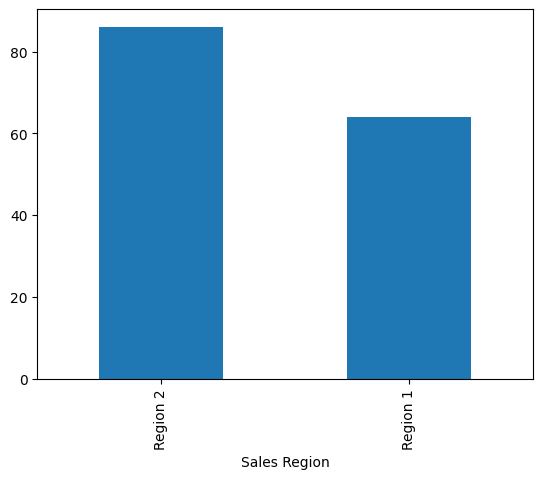

In [154]:
startups['Sales Region'].value_counts().plot.bar()

In [155]:
startups[startups['New Expansion']== 'Old'].groupby('State').sum()['Revenue'].nlargest(10) 
#The .nlargest(10) function returns the 10 states with the highest sum revenue.(finding the top 10 cities)

State
California     1362468
Texas           554964
Florida         479023
Washington      298013
Alabama         221025
New York        160046
Connecticut     158511
Georgia         157656
Colorado        156495
Michigan        147759
Name: Revenue, dtype: int64

In [156]:
startups[startups['New Expansion']== 'New'].groupby('State').sum()['Revenue'].nlargest(10)

State
California    141883
Illinois       91692
Texas          85605
Tennessee      55357
Arizona        48954
New Jersey     34603
Name: Revenue, dtype: int64

In [157]:
startups['Profit']=startups['Revenue'] - startups['Marketing Spend']

In [158]:
startups

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit
0,1,Peoria,Arizona,Region 2,Old,2601,48610,46009
1,2,Midland,Texas,Region 2,Old,2727,45689,42962
2,3,Spokane,Washington,Region 2,Old,2768,49554,46786
3,4,Denton,Texas,Region 2,Old,2759,38284,35525
4,5,Overland Park,Kansas,Region 2,Old,2869,59887,57018
...,...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251,34603,32352
146,147,Brownsville,Texas,Region 2,New,3675,63148,59473
147,148,Rockford,Illinois,Region 1,New,2648,43377,40729
148,149,College Station,Texas,Region 2,New,2994,22457,19463


In [161]:
startups['ROMS']=round((startups['Profit'] / startups['Marketing Spend'])*100,2)

In [162]:
startups['ROMS%']=startups['ROMS']/100

In [163]:
startups['ROMS'] / startups['Marketing Spend']
startups

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit,ROMS,ROMS%
0,1,Peoria,Arizona,Region 2,Old,2601,48610,46009,1768.90,17.6890
1,2,Midland,Texas,Region 2,Old,2727,45689,42962,1575.43,15.7543
2,3,Spokane,Washington,Region 2,Old,2768,49554,46786,1690.25,16.9025
3,4,Denton,Texas,Region 2,Old,2759,38284,35525,1287.60,12.8760
4,5,Overland Park,Kansas,Region 2,Old,2869,59887,57018,1987.38,19.8738
...,...,...,...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251,34603,32352,1437.23,14.3723
146,147,Brownsville,Texas,Region 2,New,3675,63148,59473,1618.31,16.1831
147,148,Rockford,Illinois,Region 1,New,2648,43377,40729,1538.10,15.3810
148,149,College Station,Texas,Region 2,New,2994,22457,19463,650.07,6.5007


we add some columns like Profit / ROMS (return of marketing spend) / ROMS% for better understanding our data.

In [164]:
startups.to_csv('startups-expansion-new.csv')